**Traffic Sign`classificaton **


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahdiyedarjazini","key":"219e25a6e6f32ba281b18b8c899e9453"}'}

In [4]:
! pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600~/.kaggle/kaggle.json

chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [6]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          88524        995  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11621        263  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recognition-benchmark     GTSRB German Traffic Sign Recognition Benchmark    231MB  2023-01-08 16:48:07             43          9  0.4375           
eunjurho/german-traffic-sign-recognition-benchmark

In [9]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100% 610M/612M [00:19<00:00, 28.5MB/s]
100% 612M/612M [00:19<00:00, 32.4MB/s]


In [10]:
!unzip gtsrb-german-traffic-sign.zip -d traffic_sign_dataset

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os


In [12]:
for dirpath,dirname,filename in os.walk("traffic_sign_dataset"):
  print(dirpath,dirname,len(filename))

traffic_sign_dataset ['Test', 'Meta', 'meta', 'test', 'Train', 'train'] 3
traffic_sign_dataset/Test [] 12631
traffic_sign_dataset/Meta [] 45
traffic_sign_dataset/meta [] 45
traffic_sign_dataset/test [] 12631
traffic_sign_dataset/Train ['23', '38', '6', '30', '22', '17', '4', '29', '24', '11', '19', '1', '25', '14', '39', '37', '33', '35', '18', '34', '28', '9', '0', '20', '8', '16', '13', '2', '42', '10', '36', '31', '40', '7', '21', '3', '5', '15', '41', '26', '12', '32', '27'] 0
traffic_sign_dataset/Train/23 [] 510
traffic_sign_dataset/Train/38 [] 2070
traffic_sign_dataset/Train/6 [] 420
traffic_sign_dataset/Train/30 [] 450
traffic_sign_dataset/Train/22 [] 390
traffic_sign_dataset/Train/17 [] 1110
traffic_sign_dataset/Train/4 [] 1980
traffic_sign_dataset/Train/29 [] 270
traffic_sign_dataset/Train/24 [] 270
traffic_sign_dataset/Train/11 [] 1320
traffic_sign_dataset/Train/19 [] 210
traffic_sign_dataset/Train/1 [] 2220
traffic_sign_dataset/Train/25 [] 1500
traffic_sign_dataset/Train/14 

In [13]:
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test

In [14]:
counter = 0
for dirpath,dirname,filename in os.walk("traffic_sign_dataset"):
  print(dirpath,dirname,len(filename))
  counter += 1
print(counter)


traffic_sign_dataset ['Test', 'Train'] 3
traffic_sign_dataset/Test [] 12631
traffic_sign_dataset/Train ['23', '38', '6', '30', '22', '17', '4', '29', '24', '11', '19', '1', '25', '14', '39', '37', '33', '35', '18', '34', '28', '9', '0', '20', '8', '16', '13', '2', '42', '10', '36', '31', '40', '7', '21', '3', '5', '15', '41', '26', '12', '32', '27'] 0
traffic_sign_dataset/Train/23 [] 510
traffic_sign_dataset/Train/38 [] 2070
traffic_sign_dataset/Train/6 [] 420
traffic_sign_dataset/Train/30 [] 450
traffic_sign_dataset/Train/22 [] 390
traffic_sign_dataset/Train/17 [] 1110
traffic_sign_dataset/Train/4 [] 1980
traffic_sign_dataset/Train/29 [] 270
traffic_sign_dataset/Train/24 [] 270
traffic_sign_dataset/Train/11 [] 1320
traffic_sign_dataset/Train/19 [] 210
traffic_sign_dataset/Train/1 [] 2220
traffic_sign_dataset/Train/25 [] 1500
traffic_sign_dataset/Train/14 [] 780
traffic_sign_dataset/Train/39 [] 300
traffic_sign_dataset/Train/37 [] 210
traffic_sign_dataset/Train/33 [] 689
traffic_sign_d

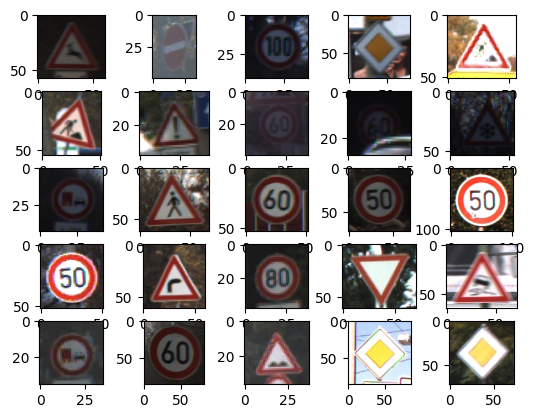

In [15]:

from matplotlib.image import imread


path = "traffic_sign_dataset/Test"
for i in range(1,26):
  plt.subplot(5,5,i)
  image = imread(path+'/'+ random.choice(os.listdir(path)))
  plt.imshow(image)


In [16]:
plt.savefig('plot.png')

<Figure size 640x480 with 0 Axes>

In [17]:
dim1 = []
dim2= []
for labels in range(0,43):
  labels = "traffic_sign_dataset/Train" + '/{0}'.format(labels)
  path = os.listdir(labels)
  for file in path:
      image = imread(labels+'/'+ file)
      dim1.append(image.shape[0])
      dim2.append(image.shape[1])


In [18]:
np.mean(dim1), np.mean(dim2)

(50.328929582493814, 50.83587951745773)

In [20]:
from PIL import Image
images=[]
label_id=[]
for i in range(0,43):
  labels = "traffic_sign_dataset/Train" + '/{0}'.format(i)
  path = os.listdir(labels)
  for file in path:
      image = Image.open(labels+'/'+ file)
      image = image.resize((50,50))
      image = np.array(image)
      images.append(image)
      label_id.append(i)





In [21]:
images = np.array(images)
images = images/255

In [22]:
label_id = np.array(label_id)
label_id


array([ 0,  0,  0, ..., 42, 42, 42])

In [23]:
images.shape

(39209, 50, 50, 3)

In [24]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts


2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
34     420
6      420
36     390
22     390
40     360
20     360
21     330
39     300
29     270
24     270
41     240
42     240
32     240
27     240
37     210
19     210
0      210
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(images, label_id, test_size=.2,random_state=42)

In [26]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)


In [27]:
y_train.shape


(31367,)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPool2D

model = Sequential([
Conv2D(64, 3,input_shape=x_train.shape[1:], activation="relu",padding="same"),
MaxPool2D(pool_size=(2,2)),
Dropout(.5),
Conv2D (64,3, activation="relu",padding="same"),
MaxPool2D(pool_size=(2,2)),
Dropout(.5),
Flatten(),
Dense(128, activation="relu"),
Dropout(.5),
Dense(43, activation="softmax")

])

In [29]:
model.compile(
optimizer= tf.keras.optimizers.Adam(),
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
metrics= ['accuracy'])


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0

In [37]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data = (x_val,y_val), verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


981/981 - 19s - loss: 2.0469 - accuracy: 0.4073 - val_loss: 0.8426 - val_accuracy: 0.7916 - 19s/epoch - 20ms/step
Epoch 2/10
981/981 - 6s - loss: 0.9336 - accuracy: 0.6954 - val_loss: 0.3614 - val_accuracy: 0.9147 - 6s/epoch - 7ms/step
Epoch 3/10
981/981 - 7s - loss: 0.6605 - accuracy: 0.7815 - val_loss: 0.2520 - val_accuracy: 0.9482 - 7s/epoch - 8ms/step
Epoch 4/10
981/981 - 7s - loss: 0.5342 - accuracy: 0.8249 - val_loss: 0.1970 - val_accuracy: 0.9670 - 7s/epoch - 7ms/step
Epoch 5/10
981/981 - 7s - loss: 0.4463 - accuracy: 0.8517 - val_loss: 0.1291 - val_accuracy: 0.9741 - 7s/epoch - 7ms/step
Epoch 6/10
981/981 - 7s - loss: 0.4039 - accuracy: 0.8687 - val_loss: 0.1016 - val_accuracy: 0.9805 - 7s/epoch - 7ms/step
Epoch 7/10
981/981 - 7s - loss: 0.3499 - accuracy: 0.8851 - val_loss: 0.0967 - val_accuracy: 0.9828 - 7s/epoch - 7ms/step
Epoch 8/10
981/981 - 7s - loss: 0.3259 - accuracy: 0.8932 - val_loss: 0.0754 - val_accuracy: 0.9842 - 7s/epoch - 7ms/step
Epoch 9/10
981/981 - 7s - loss: 

In [38]:

model.save('saved_trained_model')

In [78]:
import tensorflow as tf


tf.keras.models.load_model('saved_trained_model')

<Axes: >

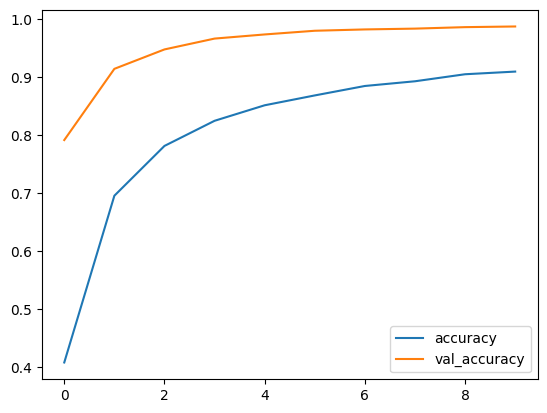

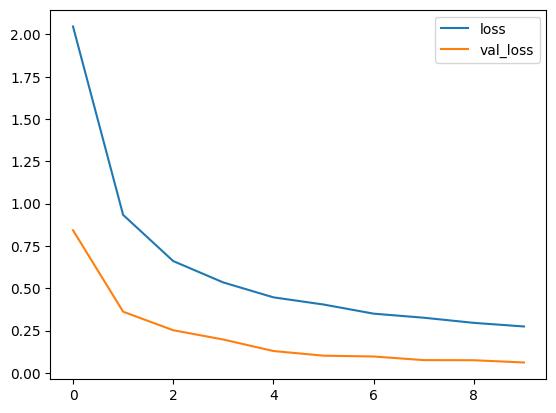

In [39]:
evaluation = pd.DataFrame(model.history.history)
evaluation[["accuracy","val_accuracy"]].plot()
evaluation[["loss","val_loss"]].plot()

In [79]:
from PIL import Image
!rm 'traffic_sign_dataset/Test/GT-final_test.csv'
test_path = "traffic_sign_dataset/Test"

def reshaping_test_data(file,test_path):
  test_images=[]
  for i in file:
    image = Image.open(test_path+ '/' + i)
    image = image.resize((50,50))
    image = np.array(image)
    test_images.append(image)
  return test_images


rm: cannot remove 'traffic_sign_dataset/Test/GT-final_test.csv': No such file or directory


In [77]:
test_path = "traffic_sign_dataset/Test"
all_test = os.listdir(test_path)
len(all_test)

12630

In [82]:
test_path = "traffic_sign_dataset/Test"
all_test_reshaped =reshaping_test_data(all_test,test_path)
len(all_test_reshaped)

12630

In [84]:
all_test_reshaped = np.array(all_test_reshaped)
all_test_reshaped.shape

(12630, 50, 50, 3)

In [35]:
test = pd.read_csv("traffic_sign_dataset/Test.csv")
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [36]:
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [85]:

y_preds = np.argmax(model.predict(all_test_reshaped),axis=1)
y_preds



395/395 [==============================] - 2s 3ms/step


array([12, 10, 23, ...,  1,  2, 10])

In [90]:
y_preds.shape

(12630,)

In [102]:
y_preds[1]

10

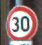

In [92]:
sample_image = Image.open(test_path+'/00001.png')
sample_image

according labels in kaggle y_preds[1]=10  is equal calss of speed limit 30km/h
then we can see true label is exact predict label,we get conculution our model predict is working